In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [19]:
gold_data = pd.read_csv(r"C:\Users\osara\Downloads\archive (11)\gld_price_data.csv")

In [20]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [25]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

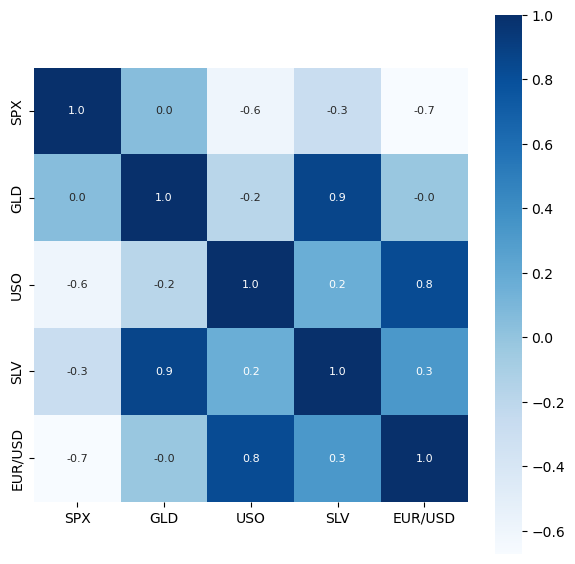

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,  annot_kws={'size':8},  cmap='Blues')

In [33]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

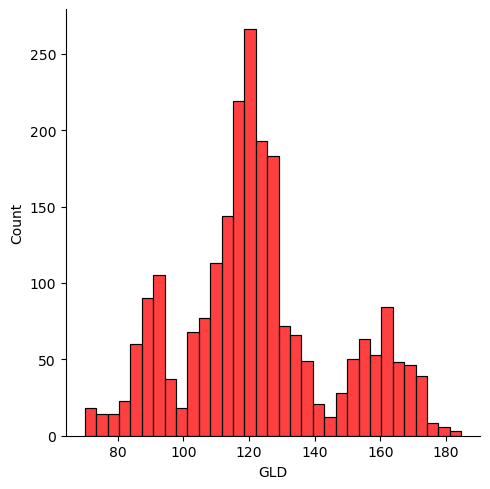

In [34]:
sns.displot(gold_data['GLD'], color='red')

Splitting data

In [43]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)

In [44]:
y = gold_data['GLD']

Training the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [46]:
#model traing
model = RandomForestRegressor(n_estimators = 100)

In [47]:
model.fit(X_train,y_train)

RandomForestRegressor()

Evaluation and prediction

In [50]:
prediction = model.predict(X_train)

In [51]:
prediction

array([121.39299859, 146.83320016, 109.27580159, ...,  93.87360162,
       173.62629711, 122.87859858])

In [52]:
#R squared error
score_1 = metrics.r2_score(y_train, prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train, prediction)

In [54]:
score_2

0.4832151078002147

In [56]:
test_prediction = model.predict(X_test)

In [58]:
test_score_1 = metrics.r2_score(y_test, test_prediction)

#mean absolute error
test_score_2 = metrics.mean_absolute_error(y_test, test_prediction)

In [59]:
test_score_1

0.9932722978240411

In [75]:
y_test= list(y_train)
# test_prediction = list(test_prediction)

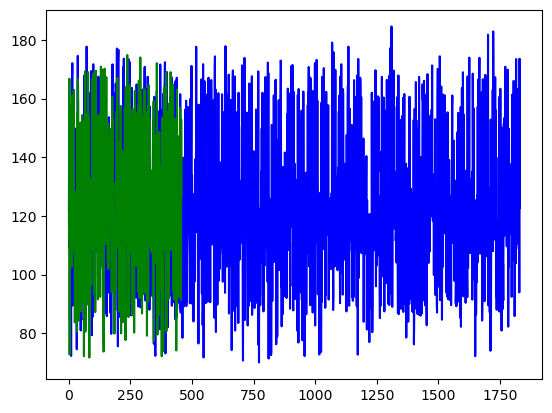

In [76]:
plt.plot(y_test, color='blue', label='Actual price')
plt.plot(test_prediction, color='green', label='Predicted price')
